In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Visadataset.csv")

In [3]:
data = df.copy()

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
data.shape

(25480, 12)

In [8]:
list(data.columns)

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'no_of_employees',
 'yr_of_estab',
 'region_of_employment',
 'prevailing_wage',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [9]:
# No fuplicated value in data
data[data.duplicated()]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [10]:
# 0 null valus in data
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [11]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [12]:
catagorical_features = data.dtypes[data.dtypes == "object"].index

In [13]:
catagorical_features

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [14]:
numerical_features = data.dtypes[data.dtypes != "object"].index

In [15]:
numerical_features

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [16]:
# all numerical colums mean value
data[numerical_features].mean()

no_of_employees     5667.043210
yr_of_estab         1979.409929
prevailing_wage    74455.814592
dtype: float64

In [17]:
# all numerical colums median value
data[numerical_features].median()

no_of_employees     2109.00
yr_of_estab         1997.00
prevailing_wage    70308.21
dtype: float64

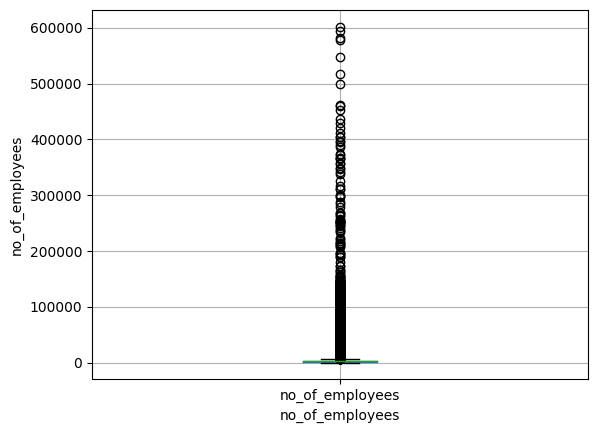

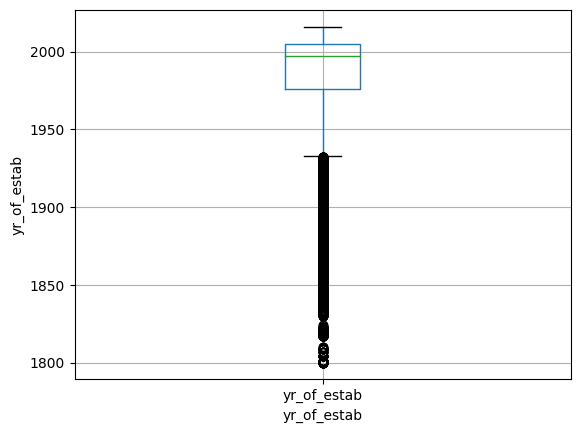

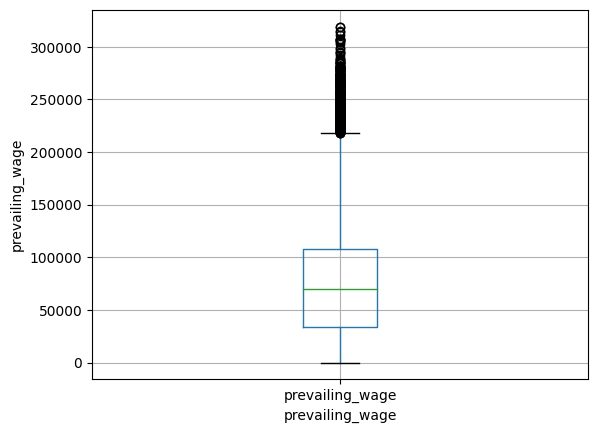

In [18]:
for i in numerical_features:
    data.boxplot(column=i)
    plt.xlabel(i)
    plt.ylabel(i)    
    plt.show()
    

In [19]:
# count alue of continent
data["continent"].value_counts(normalize=True)*100

Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64

In [20]:
# count value of all catiogerical features
for i in catagorical_features:
    print(i,data[i].value_counts(normalize=True)*100)
    
    print("=========================================")

case_id EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: case_id, Length: 25480, dtype: float64
continent Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
education_of_employee Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
has_job_experience Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
requires_job_training N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64
region_of_employment Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: region_

<AxesSubplot:title={'center':'CountPlot Of Continent'}, xlabel='continent', ylabel='count'>

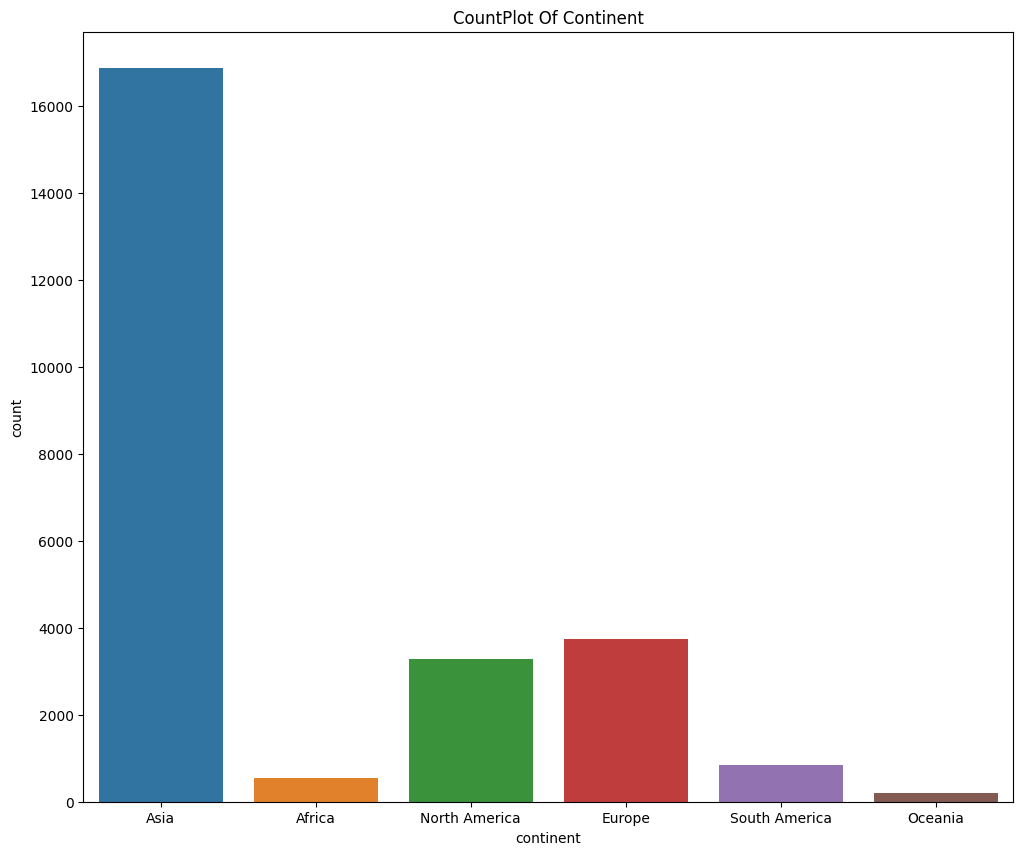

In [21]:
plt.figure(figsize=(12,10))
plt.title("CountPlot Of Continent")
sns.countplot(data["continent"])

<AxesSubplot:title={'center':'CountPlot Of Job Training'}, xlabel='requires_job_training', ylabel='count'>

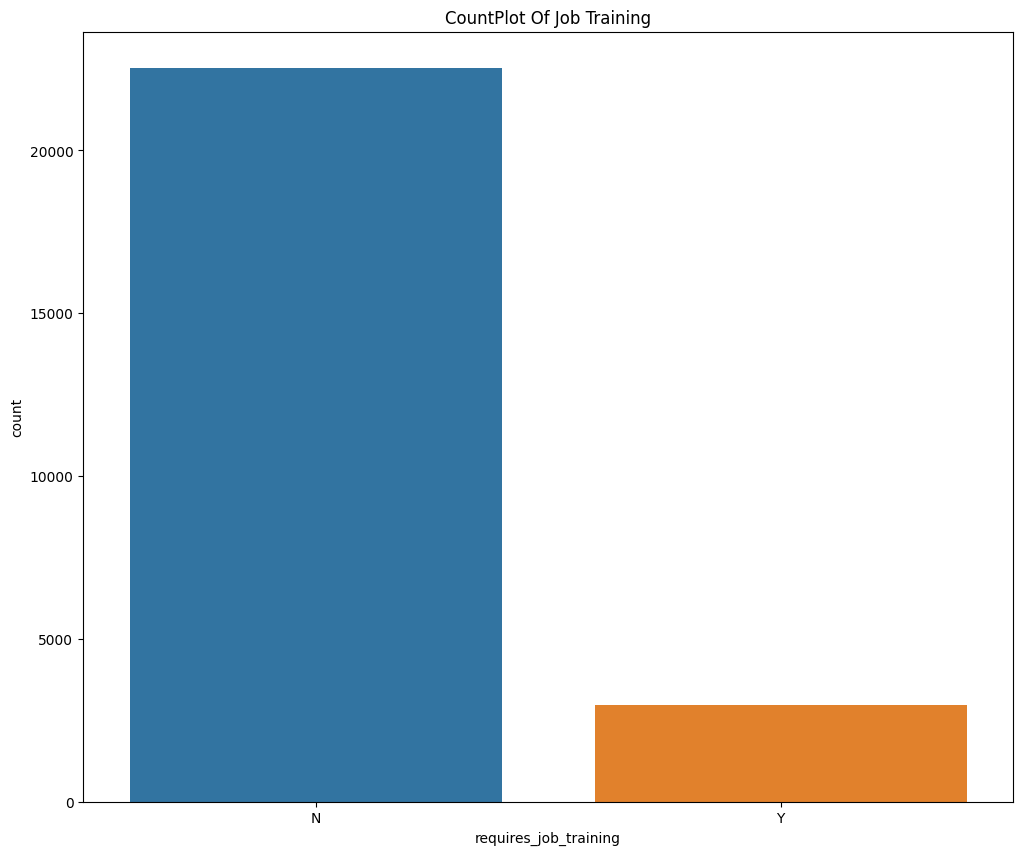

In [22]:
plt.figure(figsize=(12,10))
plt.title("CountPlot Of Job Training")
sns.countplot(data["requires_job_training"])

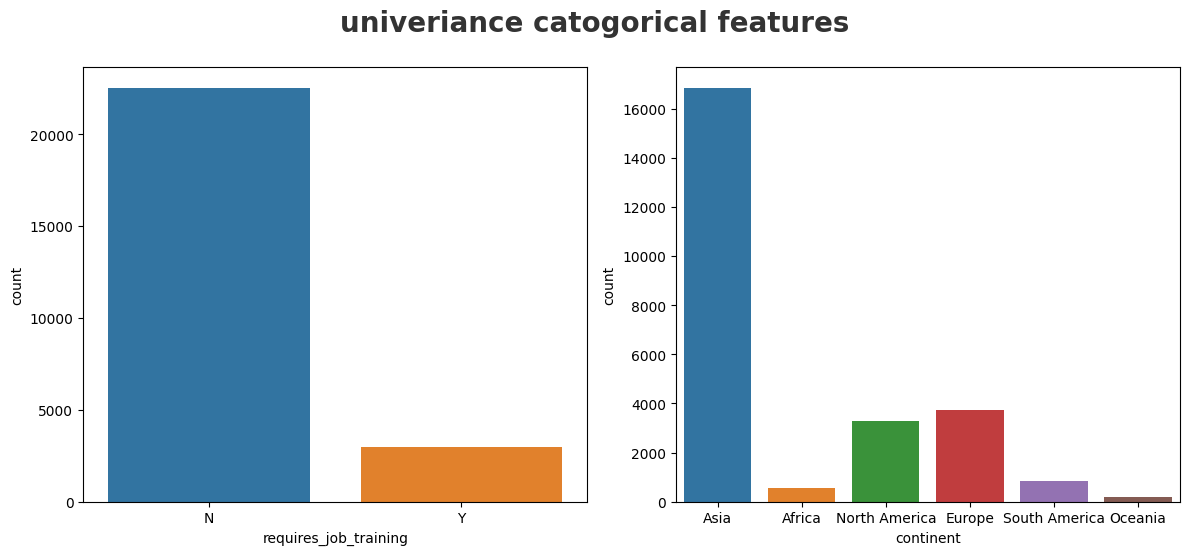

In [23]:
cato = ["requires_job_training","continent"]
plt.figure(figsize=(12,10))
plt.suptitle("univeriance catogorical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)
for i in range(0,len(cato)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = data[cato[i]])
    plt.tight_layout()

In [24]:
numerical_features

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

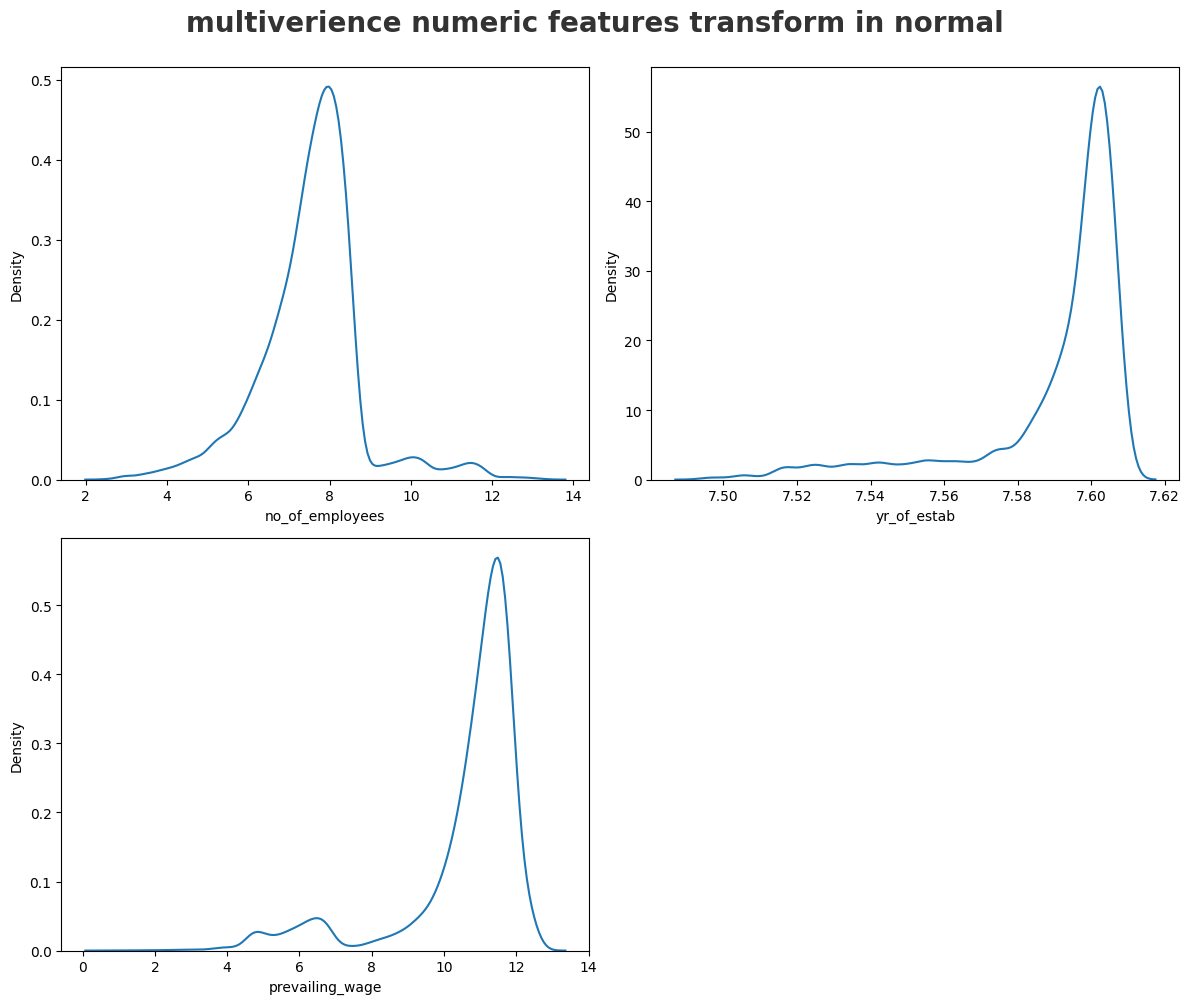

In [25]:
plt.figure(figsize=(12,10))
plt.suptitle("multiverience numeric features transform in normal",fontsize=20,fontweight="bold",alpha=0.8,y=1)
for i in range(0,len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x = np.log(data[numerical_features[i]]))
    plt.tight_layout()

In [26]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<AxesSubplot:ylabel='education_of_employee'>

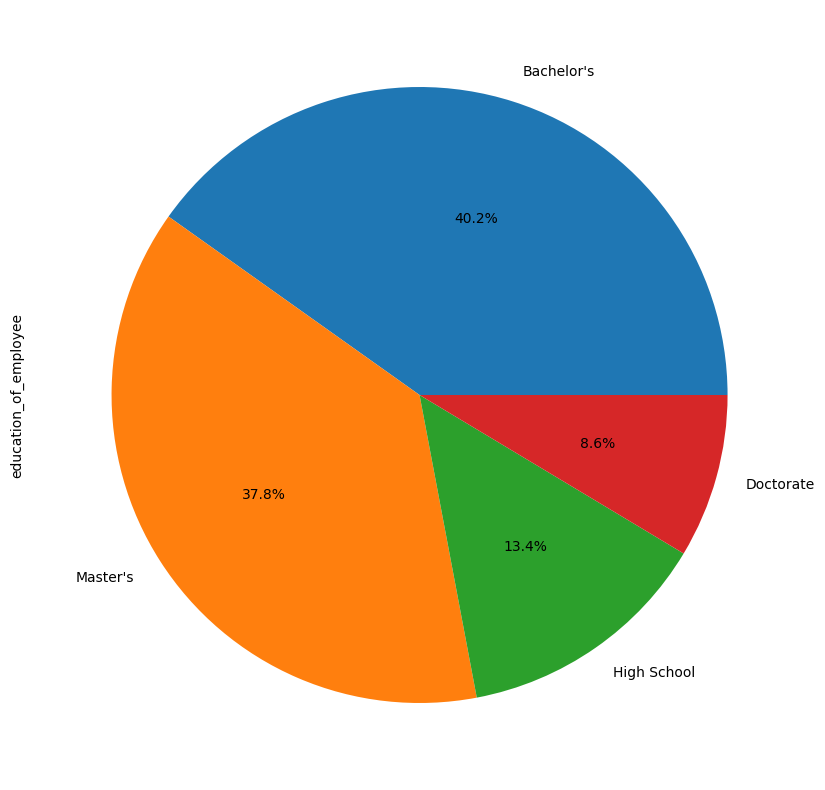

In [27]:
plt.figure(figsize=(10,10))
data["education_of_employee"].value_counts().plot.pie(autopct="%1.1f%%")

In [28]:
employee = data.groupby("education_of_employee")["no_of_employees"].sum().sort_values(ascending=False)

In [29]:
employee

education_of_employee
Master's       59580266
Bachelor's     52871340
High School    16982171
Doctorate      14962484
Name: no_of_employees, dtype: int64

<AxesSubplot:ylabel='no_of_employees'>

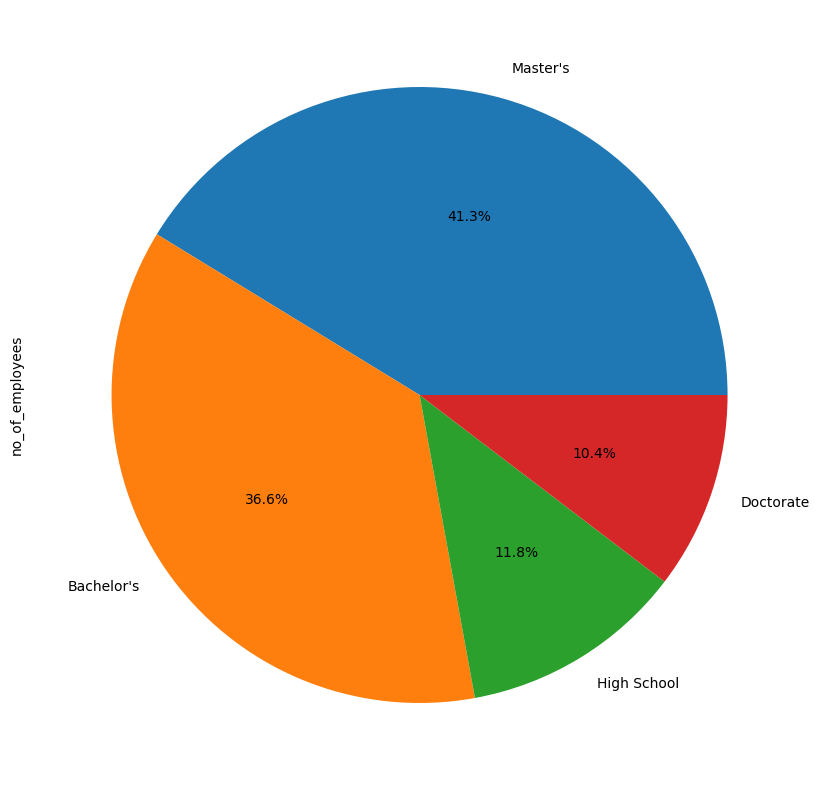

In [30]:
# Employee numbers
plt.figure(figsize=(10,10))
employee.plot.pie(autopct="%1.1f%%")

In [31]:
ststus = data.groupby("case_status")["no_of_employees"].sum().sort_values(ascending=False)

In [32]:
ststus

case_status
Certified    98823835
Denied       45572426
Name: no_of_employees, dtype: int64

<AxesSubplot:ylabel='no_of_employees'>

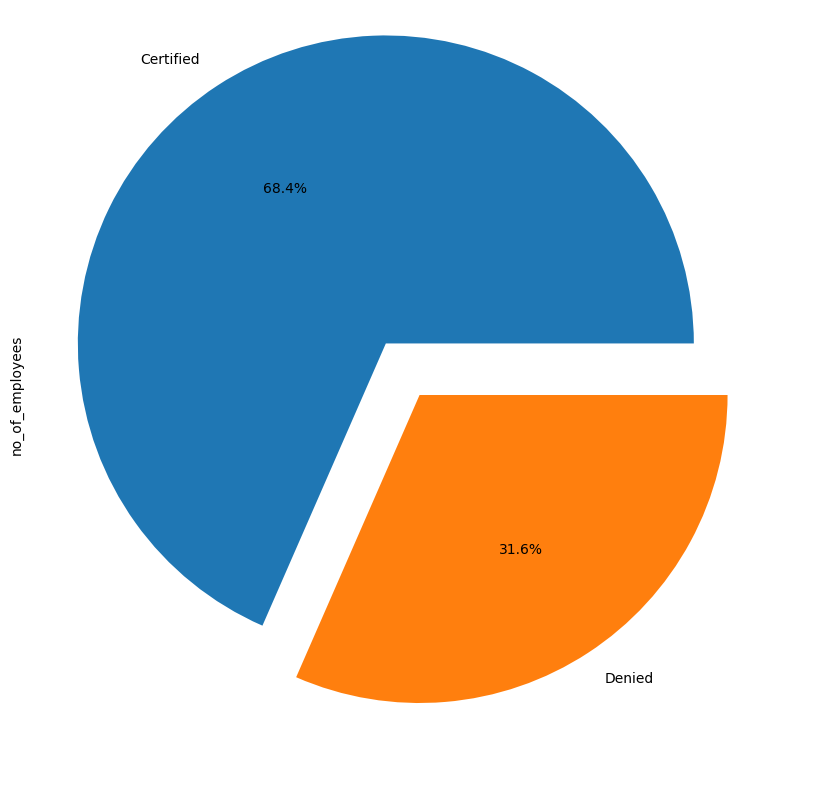

In [33]:
plt.figure(figsize=(10,10))
ststus.plot.pie(autopct="%1.1f%%",explode=(0.2,0))

In [34]:
prevailing_wage = data.groupby("continent")["prevailing_wage"].sum().sort_values(ascending=False).reset_index()

In [35]:
# prevailing_wage
prevailing_wage

,continent,prevailing_wage
0,Asia,1.341175e+09
1,North America,2.240743e+08
2,Europe,2.233338e+08
3,South America,5.129856e+07
4,Africa,4.266168e+07
5,Oceania,1.459090e+07


<AxesSubplot:title={'center':'prevailing wage in continents'}, xlabel='continent', ylabel='prevailing_wage'>

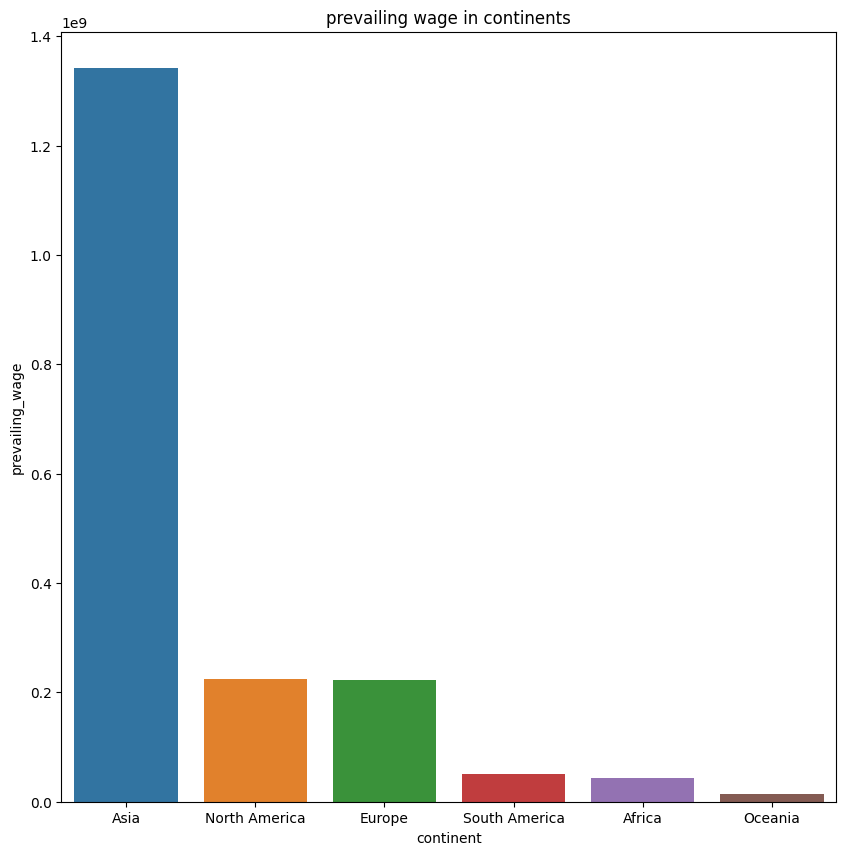

In [36]:
plt.figure(figsize=(10,10))
plt.title("prevailing wage in continents")
sns.barplot(x="continent",y="prevailing_wage",data=prevailing_wage)

In [37]:
regions = data.groupby("region_of_employment")["no_of_employees"].sum().sort_values(ascending=False).reset_index()

In [38]:
regions

,region_of_employment,no_of_employees
0,Northeast,42811608
1,South,42033718
2,West,37804840
3,Midwest,19089177
4,Island,2656918


<AxesSubplot:title={'center':'Reagion Of Employeement'}, xlabel='region_of_employment', ylabel='no_of_employees'>

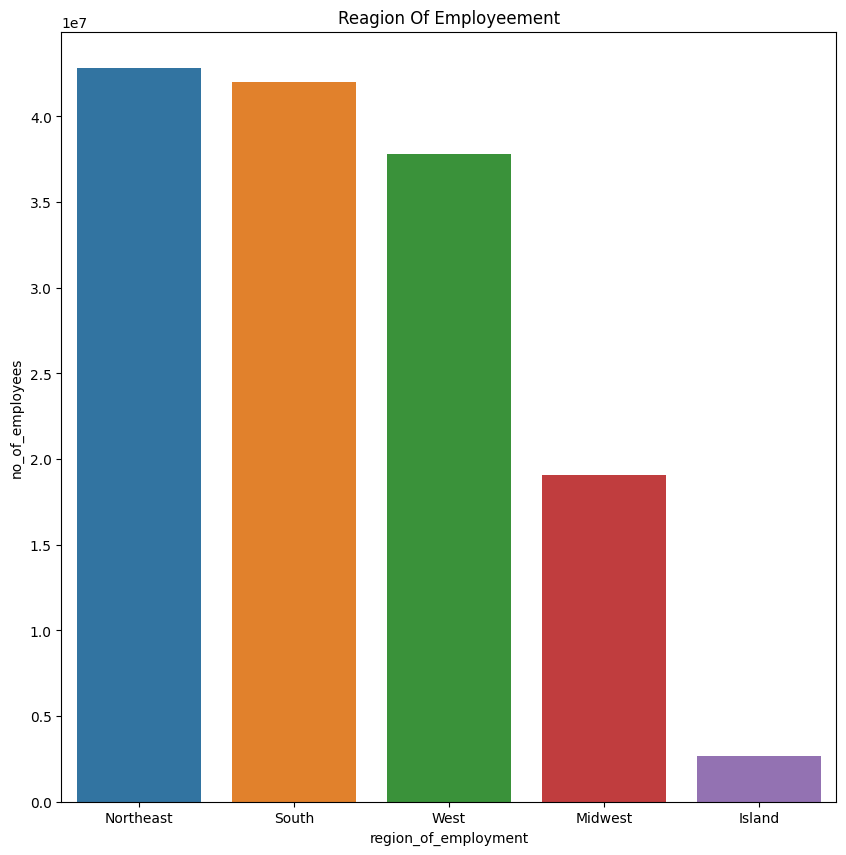

In [39]:
plt.figure(figsize=(10,10))
plt.title("Reagion Of Employeement")
sns.barplot(x="region_of_employment",y="no_of_employees",data=regions)

<AxesSubplot:xlabel='no_of_employees', ylabel='continent'>

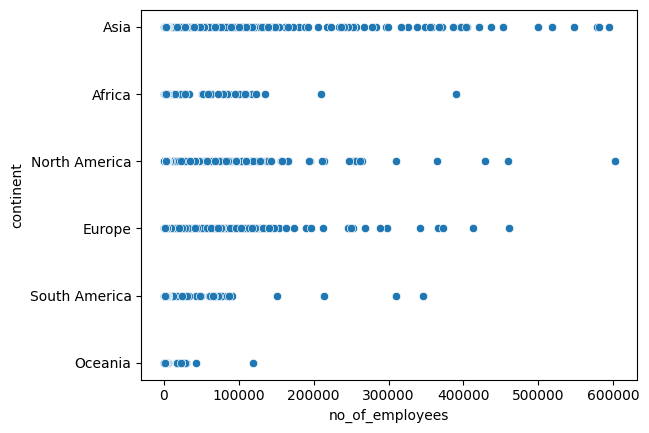

In [40]:
sns.scatterplot(x="no_of_employees",y="continent",data=data)

In [41]:
compare = data.groupby(["education_of_employee","case_status"])["prevailing_wage"].sum().sort_values(ascending=False)

<AxesSubplot:title={'center':'Certified VS Denied'}, ylabel='prevailing_wage'>

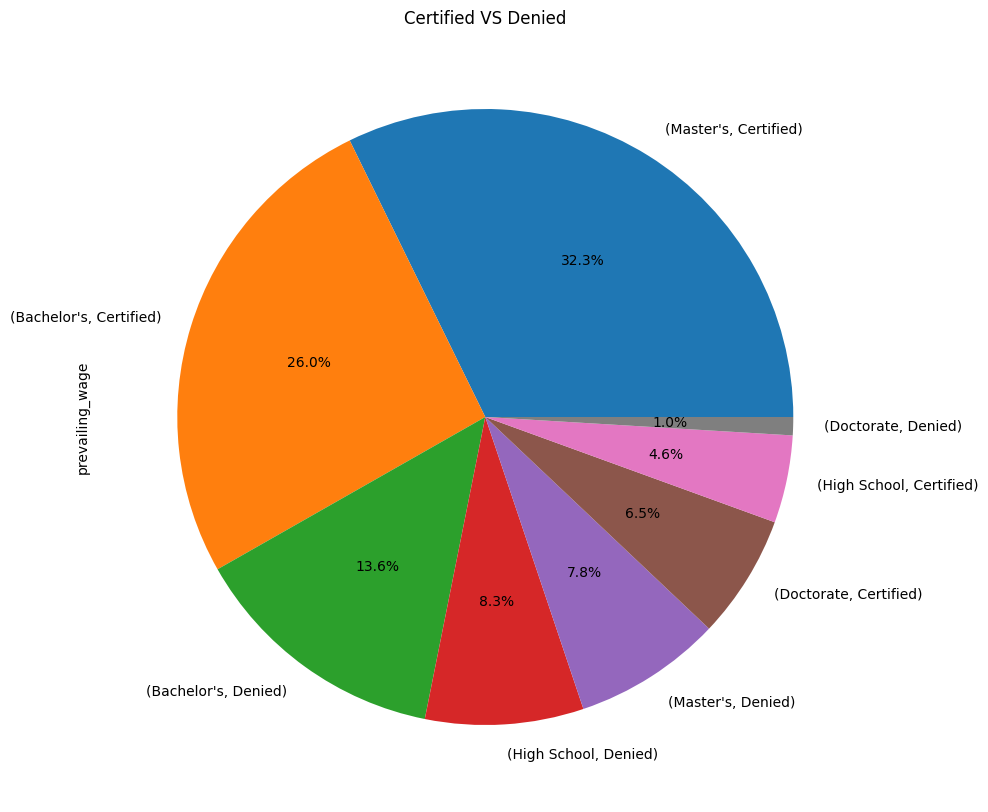

In [42]:
plt.figure(figsize=(10,10))
plt.title("Certified VS Denied")
compare.plot.pie(autopct="%1.1f%%")

<AxesSubplot:xlabel='continent', ylabel='no_of_employees'>

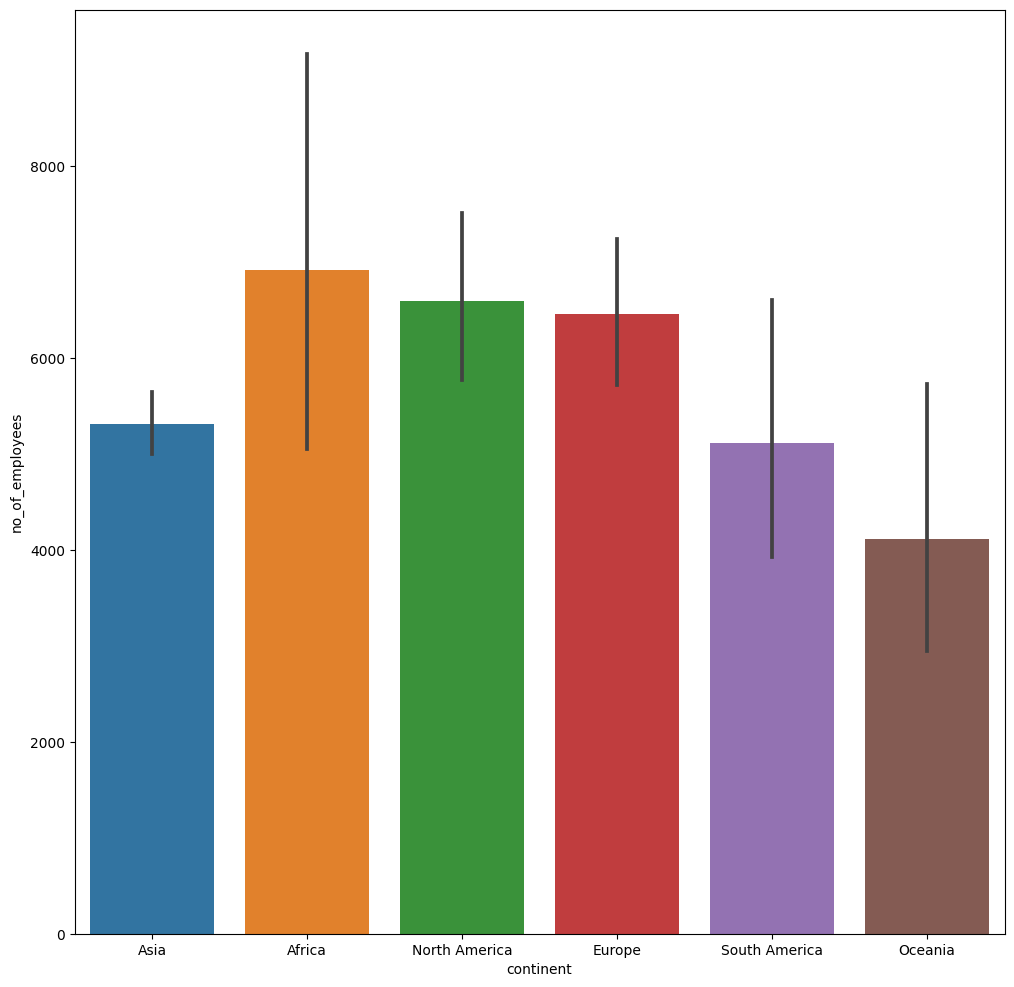

In [44]:
plt.figure(figsize=(12,12))
sns.barplot(x = "continent",y="no_of_employees",data=data)